# Apply OE

#### What is Apply OE?

Apply OE is the built-in end-to-end atmospheric correction pipeline, and is the easiest way to run Isofit. Apply OE is run via a command line interface (CLI) tool accessed with a terminal call:

 `isofit apply_oe --help`

 The function docstring is printed when this command is run within a terminal window, and acts as a guide for how to run the function.

 ```
isofit apply_oe --help

Usage: isofit apply_oe [OPTIONS] INPUT_RADIANCE INPUT_LOC INPUT_OBS
                       WORKING_DIRECTORY SENSOR

  Applies OE over a flightline using a radiative transfer engine. This
  executes ISOFIT in a generalized way, accounting for the types of variation
  that might be considered typical.

  Observation (obs) and location (loc) files are used to determine appropriate
  geometry lookup tables and provide a heuristic means of determining
  atmospheric water ranges.

  Parameters
  ----------
  input_radiance : str
      Radiance data cube. Expected to be ENVI format
  input_loc : str
      Location data cube of shape (Lon, Lat, Elevation). Expected to be ENVI format
  input_obs : str
      Observation data cube of shape:
          (path length, to-sensor azimuth, to-sensor zenith,
          to-sun azimuth, to-sun zenith, phase,
          slope, aspect, cosine i, UTC time)
      Expected to be ENVI format
  working_directory : str
      Directory to stage multiple outputs, will contain subdirectories
  sensor : str
      The sensor used for acquisition, will be used to set noise and datetime
      settings
  surface_path : str
      Path to surface model or json dict of surface model configuration
  copy_input_files : bool, default=False
      Flag to choose to copy input_radiance, input_loc, and input_obs locally into
      the working_directory
  modtran_path : str, default=None
      Location of MODTRAN utility. Alternately set with `MODTRAN_DIR` environment
      variable
  wavelength_path : str, default=None
      Location to get wavelength information from, if not specified the radiance
      header will be used
  surface_category : str, default="multicomponent_surface"
      The type of ISOFIT surface priors to use.  Default is multicomponent_surface
  aerosol_climatology_path : str, default=None
      Specific aerosol climatology information to use in MODTRAN
  rdn_factors_path : str, default=None
      Specify a radiometric correction factor, if desired
  atmosphere_type : str, default="ATM_MIDLAT_SUMMER"
      Atmospheric profile to be used for MODTRAN simulations.  Unused for other
      radiative transfer models.
  channelized_uncertainty_path : str, default=None
      Path to a channelized uncertainty file
  model_discrepancy_path : str, default=None
      Modifies S_eps in the OE formalism as the Gamma additive term, as:
      S_eps = Sy + Kb.dot(self.Sb).dot(Kb.T) + Gamma
  lut_config_file : str, default=None
      Path to a look up table configuration file, which will override defaults
      choices
  multiple_restarts : bool, default=False
      Use multiple initial starting poitns for each OE ptimization run, using
      the corners of the atmospheric variables as starting points.  This gives
      a more robust, albeit more expensive, solution.
  logging_level : str, default="INFO"
      Logging level with which to run ISOFIT
  log_file : str, default=None
      File path to write ISOFIT logs to
  n_cores : int, default=1
      Number of cores to run ISOFIT with. Substantial parallelism is available, and
      full runs will be very slow in serial. Suggested to max this out on the
      available system
  presolve : int, default=False
      Flag to use a presolve mode to estimate the available atmospheric water range.
      Runs a preliminary inversion over the image with a 1-D LUT of water vapor, and
      uses the resulting range (slightly expanded) to bound determine the full LUT.
      Advisable to only use with small cubes or in concert with the empirical_line
      setting, or a significant speed penalty will be incurred
  empirical_line : bool, default=False
      Use an empirical line interpolation to run full inversions over only a subset
      of pixels, determined using a SLIC superpixel segmentation, and use a KDTREE of
      local solutions to interpolate radiance->reflectance. Generally a good option
      if not trying to analyze the atmospheric state at fine scale resolution.
      Mutually exclusive with analytical_line
  analytical_line : bool, default=False
      Use an analytical solution to the fixed atmospheric state to solve for each
      pixel.  Starts by running a full OE retrieval on each SLIC superpixel, then
      interpolates the atmospheric state to each pixel, and closes with the
      analytical solution.
      Mutually exclusive with empirical_line
  ray_temp_dir : str, default="/tmp/ray"
      Location of temporary directory for ray parallelization engine
  emulator_base : str, default=None
      Location of emulator base path. Point this at the model folder (or h5 file) of
      sRTMnet to use the emulator instead of MODTRAN. An additional file with the
      same basename and the extention _aux.npz must accompany
      e.g. /path/to/emulator.h5 /path/to/emulator_aux.npz
  segmentation_size : int, default=40
      If empirical_line is enabled, sets the size of segments to construct
  num_neighbors : list[int], default=[]
      Forced number of neighbors for empirical line extrapolation - overides default
      set from segmentation_size parameter
  atm_sigma : list[int], default=[2]
      A list of smoothing factors to use during the atmospheric interpolation, one
      for each atmospheric parameter (or broadcast to all if only one is provided).
      Only used with the analytical line.
  pressure_elevation : bool, default=False
      Flag to retrieve elevation
  prebuilt_lut : str, default=None
      Use this pre-constructed look up table for all retrievals. Must be an
      ISOFIT-compatible RTE NetCDF
  no_min_lut_spacing : bool, default=False
      Don't allow the LUTConfig to remove a LUT dimension because of minimal spacing.
  inversion_windows : list[float], default=None
      Override the default inversion windows.  Will supercede any sensor specific
      defaults that are in place.
      Must be in 2-item tuples
  config_only : bool, default=False
      Generates the configuration then exits before execution. If presolve is
      enabled, that run will still occur.
  interpolate_bad_rdn : bool, default=False
      Flag to perform a per-pixel interpolation across no-data and NaN data bands.
      Does not interpolate vectors that are entire no-data or NaN, only partial.
      Currently only designed for wavelength interpolation on spectra.
      Does NOT do any spatial interpolation
  interpolate_inplace : bool, default=False
      Flag to tell interpolation to work on the file in place, or generate a
      new interpolated rdn file. The location of the new file will be in the
      "input" directory within the working directory.

  References
  ----------
  D.R. Thompson, A. Braverman,P.G. Brodrick, A. Candela, N. Carbon, R.N. Clark,D. Connelly, R.O. Green, R.F.
  Kokaly, L. Li, N. Mahowald, R.L. Miller, G.S. Okin, T.H.Painter, G.A. Swayze, M. Turmon, J. Susilouto, and
  D.S. Wettergreen. Quantifying Uncertainty for Remote Spectroscopy of Surface Composition. Remote Sensing of
  Environment, 2020. doi: https://doi.org/10.1016/j.rse.2020.111898.

  sRTMnet emulator:
  P.G. Brodrick, D.R. Thompson, J.E. Fahlen, M.L. Eastwood, C.M. Sarture, S.R. Lundeen, W. Olson-Duvall,
  N. Carmon, and R.O. Green. Generalized radiative transfer emulation for imaging spectroscopy reflectance
  retrievals. Remote Sensing of Environment, 261:112476, 2021.doi: 10.1016/j.rse.2021.112476.

Options:
  -sp, --surface_path TEXT        [required]
  --copy_input_files
  --modtran_path TEXT
  --wavelength_path TEXT
  --surface_category TEXT
  --aerosol_climatology_path TEXT
  --rdn_factors_path TEXT
  --atmosphere_type TEXT
  --channelized_uncertainty_path TEXT
  --model_discrepancy_path TEXT
  --lut_config_file TEXT
  --multiple_restarts
  --logging_level TEXT
  --log_file TEXT
  --n_cores INTEGER
  --presolve
  --empirical_line
  --analytical_line
  --ray_temp_dir TEXT
  --emulator_base TEXT
  --segmentation_size INTEGER
  -nn, --num_neighbors INTEGER
  -as, --atm_sigma FLOAT
  --pressure_elevation
  --prebuilt_lut TEXT
  --no_min_lut_spacing
  --inversion_windows FLOAT...
  --config_only
  --interpolate_bad_rdn
  --interpolate_inplace
  --debug-args                    Prints the arguments list without executing
                                  the command
  --profile TEXT
  --help                          Show this message and exit.
  ```

The Apply OE function can leverage a large number of input parameters, but most are optional. The important inputs are the non-optional arguments: 

`INPUT_RADIANCE` `INPUT_LOC` `INPUT_OBS` `WORKING_DIRECTORY` `SENSOR` and `--surface_path`.

which must be entered in the specified order. Descriptions of each are found in the docstring printed above. It is important to note that the `INPUT_RADIANCE`, `INPUT_LOC`, and `INPUT_OBS` are ENVI raster data formats that must be at the same row-column dimensions. The `--surface_path` points Isofit torwards the constructed prior distribution file for surface reflectance. Optional arguments are denoted by the '--' in their name, e.g.  `--modtran_path`, `--pressure_elevation`. It is important to note that the default radiative transfer engine (RTE) is currently set to Modtran. You must specify an `--emulator_path` without a Modtran installation.

#### How do you run Apply OE?

The script is run via the CLI. For example:

```
isofit apply_oe \
  ~/.isofit/imagecube/small/ang20170323t202244_rdn_7000-7010 \
  ~/.isofit/imagecube/small/ang20170323t202244_loc_7000-7010 \
  ~/.isofit/imagecube/small/ang20170323t202244_obs_7000-7010 \
  ~/.isofit/examples/image_cube/small \
  ang \
  --surface_path ~/.isofit/imagecube/small/data/surface.mat \
  --emulator_base ~/.isofit/srtmnet/sRTMnet_v120.h5 \
  --n_cores 10 \
  --presolve \
  ```

Here, 

```
~/.isofit/imagecube/small/ang20170323t202244_rdn_7000-7010
~/.isofit/imagecube/small/ang20170323t202244_loc_7000-7010
~/.isofit/imagecube/small/ang20170323t202244_obs_7000-7010
```

are the radiance, location, and observational geometry files respectively. The `\` tells the CLI call to expect a multi-line input. The remaining two requried parameters are `ang`, the sensor designation (AVIRIS-NG), and the `--surface_path` pointing to the surface prior file at `~/.isofit/imagecube/small/data/surface.mat`.

The remaining arguments set Apply OE to run with:
1) `--emulator_base` points isofit to the location of the sRTMnet emulator to usse as the radiative transfer engine (RTE)
2) `--n_cores = 10` CPU cores
3) The `--presolve` algorithm to narrow down the water vapor retrievals

We can examine both the inputs and outputs of Apply OE with this run call:

In [1]:
# Common imports
import os
from pathlib import Path

from spectral import envi
from matplotlib import pyplot as plt
import numpy as np

from isofit.core.common import envi_header

In [2]:
# Load the input files
rdn_path = Path('~/.isofit/imagecube/small/ang20170323t202244_rdn_7000-7010')
loc_path = Path('~/.isofit/imagecube/small/ang20170323t202244_loc_7000-7010')
obs_path = Path('~/.isofit/imagecube/small/ang20170323t202244_obs_7000-7010')

rdn = envi.open(envi_header(str(rdn_path.expanduser())))
loc =  envi.open(envi_header(str(loc_path.expanduser())))
obs =  envi.open(envi_header(str(obs_path.expanduser())))

rdn_im = rdn.open_memmap(interleave='bip')
loc_im = loc.open_memmap(interleave='bip')
obs_im = obs.open_memmap(interleave='bip')

In [3]:
# Print the bands of the input files
print('Band names in the location file:')
[print(f"{i}") for i in loc.metadata['band names']]

print()
print('Band names in the observational geometry file:')
temp = [print(f"{i}") for i in obs.metadata['band names']]


Band names in the location file:
Longitude (WGS-84)
Latitude (WGS-84)
Elevation (m)

Band names in the observational geometry file:
Path length (m)
To-sensor azimuth (0 to 360 degrees cw from N)
To-sensor zenith (0 to 90 degrees from zenith)
To-sun azimuth (0 to 360 degrees cw from N)
To-sun zenith (0 to 90 degrees from zenith)
Solar phase
Slope
Aspect
Cosine(i)
UTC Time
Earth-sun distance (AU)


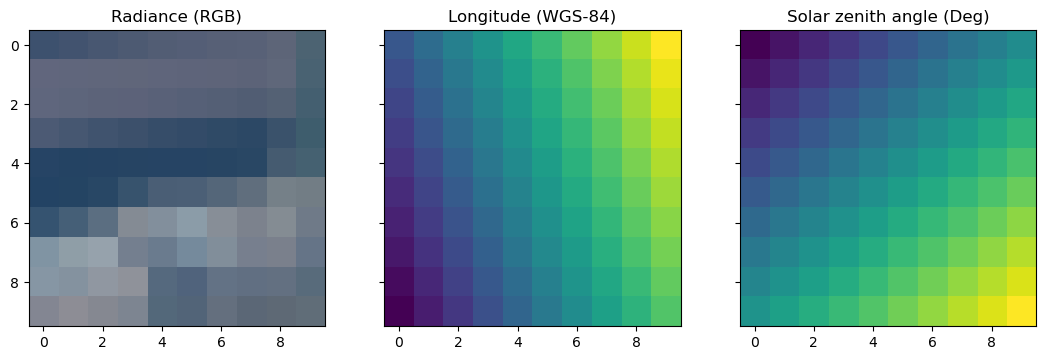

In [4]:
# Plot the input data
normalize = lambda x, vmin, vmax:  (x - vmin) / (vmax - vmin)
bands = [55, 35, 15]

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(13, 4))
plot = axs[0].imshow(normalize(rdn_im[..., bands], 0, 15))
plot = axs[1].imshow(loc_im[..., 0])
plot = axs[2].imshow(obs_im[..., 4])

title = axs[0].set_title('Radiance (RGB)')
title = axs[1].set_title('Longitude (WGS-84)')
title = axs[2].set_title('Solar zenith angle (Deg)')

The input image doesn't look like much because this is just a 10x10 pixel example. However we see per-pixel spectral variation in the radiance RGBs, and systematic variation in the location and geometric variables.

In [ ]:
# Load the output files
rfl_path = Path('~/.isofit/imagecube/small/output/ang20170323t202244_rfl')
state_path = Path('~/.isofit/imagecube/small/output/ang20170323t202244_state')
uncert_path = Path('~/.isofit/imagecube/small/output/ang20170323t202244_uncert')

rfl = envi.open(envi_header(str(rfl_path.expanduser())))
state = envi.open(envi_header(str(state_path.expanduser())))
uncert = envi.open(envi_header(str(uncert_path.expanduser())))

rfl_im = rfl.open_memmap(interleave='bip')
state_im = state.open_memmap(interleave='bip')
uncert_im = uncert.open_memmap(interleave='bip')

print(f'Shape of the _rfl file: {rfl_im.shape}')
print(f'Shape of the _state file: {state_im.shape}')
print(f'Shape of the _uncert file: {uncert_im.shape}')

Shape of the _rfl file: (10, 10, 425)
Shape of the _state file: (10, 10, 427)
Shape of the _uncert file: (10, 10, 427)


The difference between the `_rfl` file and the `_state` file is that the `_rfl` file only contains the solutions for surface reflectance variables. Here, the AVIRIS-NG image contains 425 wavelength bands. As a result, the `_rfl` contains 425 bands. The `_state` and `_uncert` files contain the surface reflectance solutions and uncertainty calculated as the standard deviation of the posterior distributions for the 425 wavelength bands and for non-reflectance statevector elements; here, aerosol optical depth (AOD) and water vapor (H2O). 

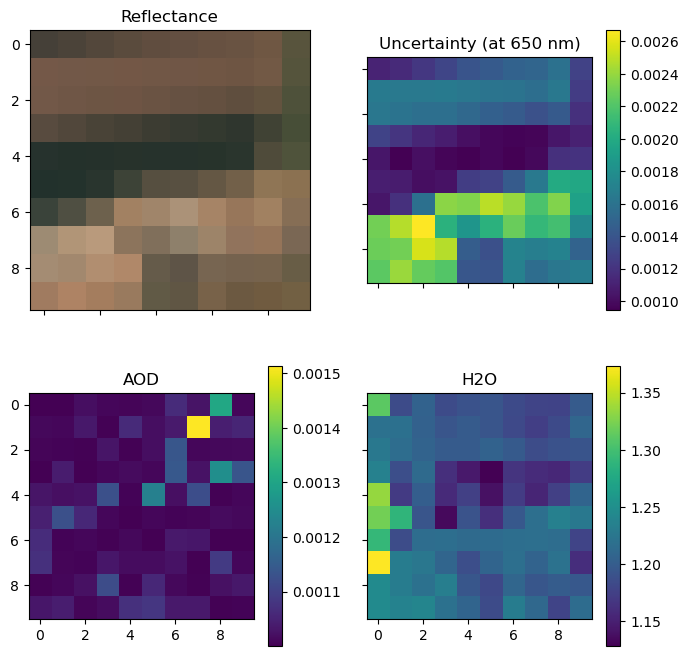

In [6]:
# Plot the output data
normalize = lambda x, vmin, vmax:  (x - vmin) / (vmax - vmin)
bands = [55, 35, 15]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))
axs = np.ravel(axs)
plot = axs[0].imshow(normalize(rfl_im[..., bands], 0, 0.3))
uncert = axs[1].imshow(uncert_im[..., 55])
aod = axs[2].imshow(state_im[..., -2])
h2o = axs[3].imshow(state_im[..., -1])

plt.colorbar(uncert)
plt.colorbar(aod)
plt.colorbar(h2o)

title = axs[0].set_title('Reflectance')
title = axs[1].set_title('Uncertainty (at 650 nm)')
title = axs[2].set_title('AOD')
title = axs[3].set_title('H2O')

#### The Analytical Line

In the example above, we ran Isofit using the full optimal estimation (OE) on each pixel independently. Computationally, this amounts to iterating through each row-column pair to solve for the full state-vector (427 variables in the above case). However for large images, this demands long run-times, and ignores the principle that some state-vector elements, namely the atmospheric variables like AOD and H2O, should not vary from one pixel to another, but rather should be spatially smooth, and only vary over multi-pixel length scales [Link to the relevent paper](https://www.sciencedirect.com/science/article/pii/S0034425723004534/).

The analytical line and empirical line algorithms leverage the assumption of a spatially smooth atmosphere to decrease run times by a factor of 10. Currently, we suggest using the analytical line algorithm and not the empirical line algorithm.

See the following CLI call to run Apply OE with the analytical line algorithm:

```
isofit apply_oe \
  ~/.isofit/imagecube/medium/ang20170323t202244_rdn_7k-8k \
  ~/.isofit/imagecube/medium/ang20170323t202244_loc_7k-8k \
  ~/.isofit/imagecube/medium/ang20170323t202244_obs_7k-8k \
  ~/.isofit/imagecube/medium \
  ang \
  --surface_path ~/.isofit/imagecube/small/data/surface.mat \
  --emulator_base ~/.isofit/srtmnet/sRTMnet_v120.h5 \
  --n_cores 10 \
  --presolve \
  --log_file ~/.isofit/imagecube/medium/log.txt \
  --analytical_line \
  --segmentation_size 50
```

Most of the input parameters are identical to the per-pixel application above. However, we've added a `--log_file`, the `--analytical_line` flag, and a `--segmentation_size`. The `--log_file` points the program to write a text file to print logging statements during run time. The `--analytical_line` flag tells Isofit to use the analytical line algorithm. 

A simple overview for the anylitical line algorithm:

1) All three input files are "segmented" into superpixel blocks using the SLIC algorithm. The  `--segmentation_size` value sets the number of pixels that each superpixel contains.

2) At the superpixel resolution, Isofit solves for the OE solutions, which provides both surface and atmospheric state variables. 

3) Atmospheric state variables are spatially interpolated to full image resolution. The spatial interpolation uses the Apply OE parameters `--num_neighbors` and `--atm_sigma`.

4) With a fixed atmosphere, we leverage a closed form solution for surface state elements that allows for a solution convergence in a single iteration.

We can visualize what the segmentation is doing by leveraging the `isofit reconstruct_subs` CLI command. 

Visualizing the input data:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1097916..1.0983623].


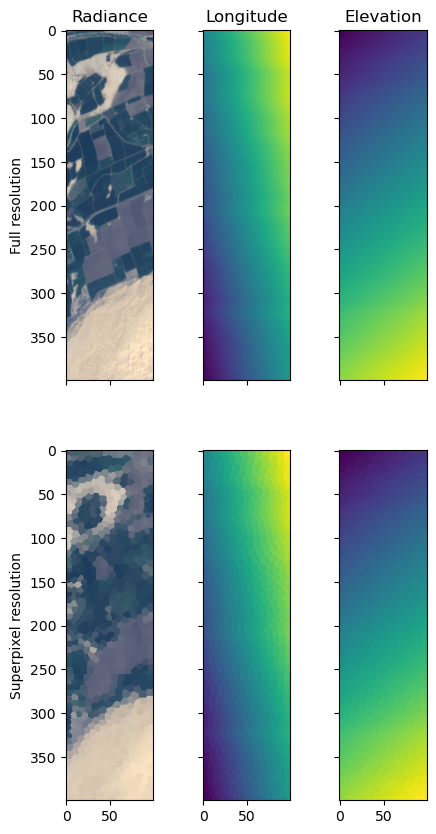

In [8]:
# Plotting the input data
rdn_path = Path('~/.isofit/imagecube/medium/ang20170323t202244_rdn_7k-8k')
loc_path = Path('~/.isofit/imagecube/medium/ang20170323t202244_loc_7k-8k')
obs_path = Path('~/.isofit/imagecube/medium/ang20170323t202244_obs_7k-8k')

subs_rdn_path = Path('~/.isofit/imagecube/medium/input/ang20170323t202244_subs_recon_rdn')
subs_loc_path = Path('~/.isofit/imagecube/medium/input/ang20170323t202244_subs_recon_loc')
subs_obs_path = Path('~/.isofit/imagecube/medium/input/ang20170323t202244_subs_recon_obs')

rdn = envi.open(envi_header(str(rdn_path.expanduser())))
loc = envi.open(envi_header(str(loc_path.expanduser())))
obs = envi.open(envi_header(str(obs_path.expanduser())))

subs_rdn = envi.open(envi_header(str(subs_rdn_path.expanduser())))
subs_loc = envi.open(envi_header(str(subs_loc_path.expanduser())))
subs_obs = envi.open(envi_header(str(subs_obs_path.expanduser())))

rdn_im = rdn.open_memmap(interleave='bip')
loc_im = loc.open_memmap(interleave='bip')
obs_im = obs.open_memmap(interleave='bip')

subs_rdn_im = subs_rdn.open_memmap(interleave='bip')
subs_loc_im = subs_loc.open_memmap(interleave='bip')
subs_obs_im = subs_obs.open_memmap(interleave='bip')

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(5, 10))
axs = np.ravel(axs)

axs[0].imshow(normalize(rdn_im[0:400, :, bands], 0, 15))
axs[1].imshow(loc[0:400, :, 0])
axs[2].imshow(obs[0:400, :, 4])

axs[3].imshow(normalize(subs_rdn_im[0:400, :, bands], 0, 15))
axs[4].imshow(subs_loc[0:400, :, 0])
axs[5].imshow(subs_obs[0:400, :, 4])

axs[0].set_title('Radiance')
axs[1].set_title('Longitude')
axs[2].set_title('Elevation')

axs[0].set_ylabel('Full resolution')
axs[3].set_ylabel('Superpixel resolution')
plt.show()

We can examine the results from Apply OE after the OE solutions on the superpixels:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1097916..1.0983623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12389879..1.5404001].


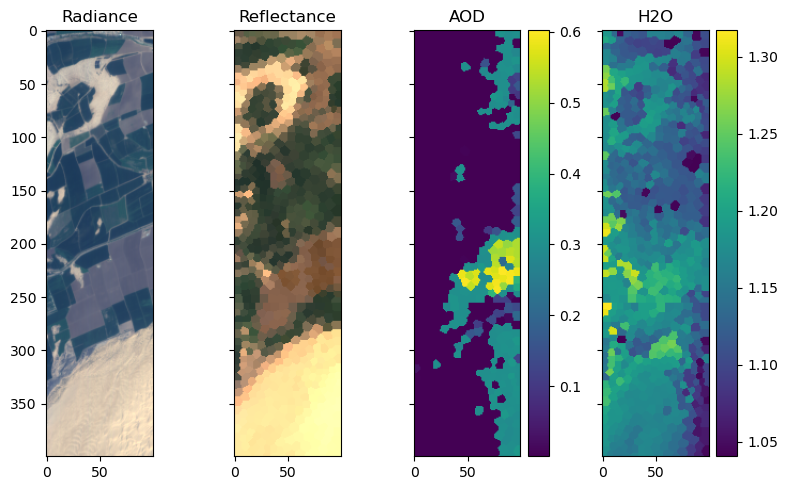

In [ ]:
wl = np.array(rdn.metadata['wavelength']).astype(float)

state_path = Path('~/.isofit/imagecube/medium/output/ang20170323t202244_recon_subs_state')
state  = envi.open(envi_header(str(state_path.expanduser())))
state_im = state.open_memmap(interleave='bip')

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(8, 5), tight_layout=True)
axs[0].imshow(normalize(rdn_im[0:400, :, bands], 0, 15))
axs[1].imshow(normalize(state_im[0:400, :, bands], 0, 0.25))
aod = axs[2].imshow(state_im[0:400, :, -2])
h2o = axs[3].imshow(state_im[0:400, :, -1])

plt.colorbar(aod)
plt.colorbar(h2o)

axs[0].set_title('Radiance')
axs[1].set_title('Reflectance')
axs[2].set_title('AOD')
axs[3].set_title('H2O')
plt.show()


Finally, we can examine the final results at the end of the anlaytical line algorithm:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1097916..1.0983623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11736042..1.7135264].


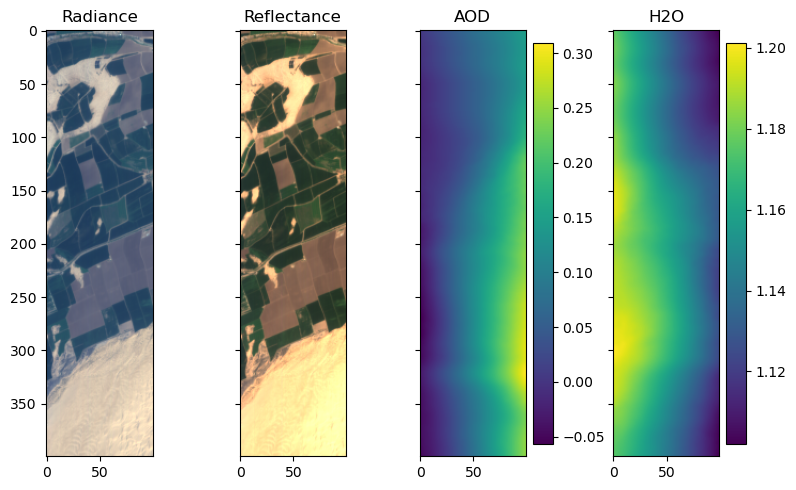

In [ ]:
rfl_path = Path('~/.isofit/imagecube/medium/output/ang20170323t202244_rfl')
atm_path = Path('~/.isofit/imagecube/medium/output/ang20170323t202244_atm_interp')

rfl  = envi.open(envi_header(str(rfl_path.expanduser())))
atm  = envi.open(envi_header(str(atm_path.expanduser())))

rfl_im = rfl.open_memmap(interleave='bip')
atm_im = atm.open_memmap(interleave='bip')


fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(8, 5), tight_layout=True)
axs[0].imshow(normalize(rdn_im[0:400, :, bands], 0, 15))
axs[1].imshow(normalize(rfl_im[0:400, :, bands], 0, 0.25))
aod = axs[2].imshow(atm_im[0:400, :, -2])
h2o = axs[3].imshow(atm_im[0:400, :, -1])

plt.colorbar(aod)
plt.colorbar(h2o)

axs[0].set_title('Radiance')
axs[1].set_title('Reflectance')
axs[2].set_title('AOD')
axs[3].set_title('H2O')
plt.show()
